# TikTok Influence on Youth: Exploratory Data Analysis

This project explores the engagement patterns, content trends, and hashtag usage in synthetic TikTok data localized to Ethiopia. The goal is to understand how different content types performs and which hashtags gain the most traction.

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

## Data Generation

In [3]:
# reproducibility 
np.random.seed(42)

# number of synthetic videos
num_rows = 5000

# fake authors
authors = [f"user_{i}" for i in range(1, 201)]

# content types
content_types = ['Dance' , 'comedy', 'Education', 'Music', 'Food', 'Travel']

# possible hashtags
hashtags_pool = [ '#tiktok', '#funny', '#dance', '#music', '#viral', '#challenge', '#habesha', '#ethiopia', '#addisababa', '#ethiopianmusic', '#ethiopianfood', '#trending','#life']

# generate synthetic data
data = pd.DataFrame({'video_id': np.arange(1, num_rows + 1),
                     'author' : np.random.choice(authors, num_rows),
                     'hashtags':[",".join(np.random.choice(hashtags_pool, size=random.randint(1,4), replace= False)) for _ in range(num_rows)],
                     'views': np.random.randint(500,1_000_000, num_rows),
                     'likes': np.random.randint(50, 300_000, num_rows),
                     'comments' : np.random.randint(0, 50_000, num_rows),
                     'video_duration': pd.to_datetime(np.random.choice(pd.date_range('2022-01-01', '2024-12-31'), num_rows)),
                     'content_type': np.random.choice(content_types, num_rows)
                                                                                     })    
                                                                                     
# inspet
data.head()

# save to csv
data.to_csv('Synthetic_tiktok_dataset.csv', index=False) 
print("Synthetic TikTok data saved as 'synthetic_tiktok_dataset.csv'")

Synthetic TikTok data saved as 'synthetic_tiktok_dataset.csv'


## Dataset Preview

In [4]:
data.head(10)

,video_id,author,hashtags,views,likes,comments,video_duration,content_type
0,1,user_103,#ethiopianmusic,104146,15497,41443,2023-12-03,Food
1,2,user_180,"#life,#dance,#funny",79284,295690,10304,2024-11-03,Dance
2,3,user_93,"#music,#challenge,#dance",89336,43447,10458,2024-07-16,Education
3,4,user_15,#ethiopianmusic,422453,200933,36619,2024-05-17,Food
4,5,user_107,"#ethiopianfood,#funny,#dance",566274,297385,46287,2023-11-20,Education
5,6,user_72,"#dance,#music,#ethiopianfood",426932,60285,39623,2023-08-25,Dance
6,7,user_189,"#challenge,#viral",437896,39451,44824,2024-09-06,Music
7,8,user_21,#funny,801368,133369,37772,2024-01-05,Food
8,9,user_103,"#ethiopianmusic,#challenge,#music,#addisababa",49594,223977,25609,2022-05-16,Education
9,10,user_122,"#trending,#music,#dance,#addisababa",810750,186896,8957,2024-05-31,Food


## Data Cleaning

In [5]:
# check for null values
data.isnull().sum()

video_id          0
author            0
hashtags          0
views             0
likes             0
comments          0
video_duration    0
content_type      0
dtype: int64

In [6]:
data.dtypes

video_id                   int64
author                    object
hashtags                  object
views                      int32
likes                      int32
comments                   int32
video_duration    datetime64[ns]
content_type              object
dtype: object

In [7]:
data['year'] = data['video_duration'].dt.year

In [8]:
data['video_duration'] = np.random.randint(10, 180, size=len(data))

In [9]:
data.head(2)

,video_id,author,hashtags,views,likes,comments,video_duration,content_type,year
0,1,user_103,#ethiopianmusic,104146,15497,41443,81,Food,2023
1,2,user_180,"#life,#dance,#funny",79284,295690,10304,134,Dance,2024


In [10]:
#summary statics
data.describe(include = 'all')

,video_id,author,hashtags,views,likes,comments,video_duration,content_type,year
count,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000
unique,NaN,200,2289,NaN,NaN,NaN,NaN,6,NaN
top,NaN,user_47,#tiktok,NaN,NaN,NaN,NaN,comedy,NaN
freq,NaN,41,118,NaN,NaN,NaN,NaN,857,NaN
mean,2500.500000,NaN,NaN,498637.337800,149892.669600,25112.230600,94.105200,NaN,2022.989600
std,1443.520003,NaN,NaN,290520.286467,86672.379977,14274.240854,49.766144,NaN,0.818551
min,1.000000,NaN,NaN,537.000000,77.000000,13.000000,10.000000,NaN,2022.000000
25%,1250.750000,NaN,NaN,241608.500000,74317.250000,12875.000000,51.000000,NaN,2022.000000
50%,2500.500000,NaN,NaN,497908.000000,148725.000000,25268.500000,94.000000,NaN,2023.000000
75%,3750.250000,NaN,NaN,755366.750000,224642.500000,37329.500000,137.000000,NaN,2024.000000


## Exploratory Data Analysis (EDA)

In [11]:
## Count frequency of each unique hashtags string
hashtag_counts = data.groupby('hashtags').value_counts().sort_values(ascending = False)

In [12]:
hashtag_counts

hashtags                                    video_id  author    views   likes   comments  video_duration  content_type  year
#addisababa                                 24        user_130  51442   38515   32113     176             Dance         2023    1
#life,#habesha,#music                       2955      user_155  218354  100388  1039      173             Dance         2024    1
#life,#music                                1236      user_111  747070  239244  45486     139             Education     2024    1
                                            1184      user_33   934876  33811   31951     43              Dance         2022    1
                                            407       user_39   61465   225754  13253     28              comedy        2023    1
                                                                                                                               ..
#ethiopianfood,#ethiopia,#tiktok,#trending  4053      user_31   449688  69158   19475     53   

## Visualizations

In [13]:
# Show mean engagement metrics,
data[["likes", "comments", "views"]].mean()

likes       149892.6696
comments     25112.2306
views       498637.3378
dtype: float64

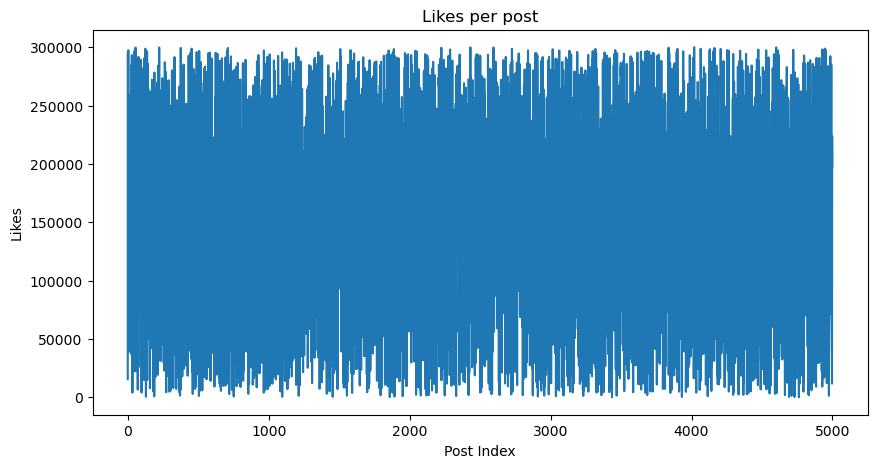

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data['likes'])
plt.title("Likes per post")
plt.xlabel("Post Index")
plt.ylabel("Likes")
plt.show()

In [15]:
data["engagement_rate"] = (data["likes"] + data["comments"] ) / data["views"]

In [16]:
data["engagement_rate"].describe()

count    5000.000000
mean        1.200915
std         5.838092
min         0.001579
25%         0.195990
50%         0.352856
75%         0.717490
max       181.467412
Name: engagement_rate, dtype: float64

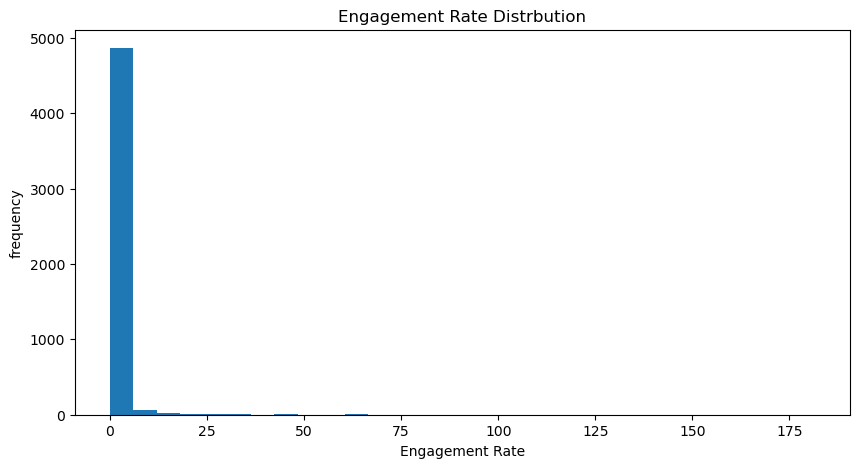

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(data["engagement_rate"], bins=30)
plt.title("Engagement Rate Distrbution")
plt.xlabel("Engagement Rate")
plt.ylabel("frequency")
plt.show()

In [18]:
data.head(2)

,video_id,author,hashtags,views,likes,comments,video_duration,content_type,year,engagement_rate
0,1,user_103,#ethiopianmusic,104146,15497,41443,81,Food,2023,0.546732
1,2,user_180,"#life,#dance,#funny",79284,295690,10304,134,Dance,2024,3.859467


## Top Content Types by Average Views/Likes

In [19]:
avg_metrics = data.groupby('content_type')[['views', 'likes']].mean().sort_values(by= 'views', ascending=False)

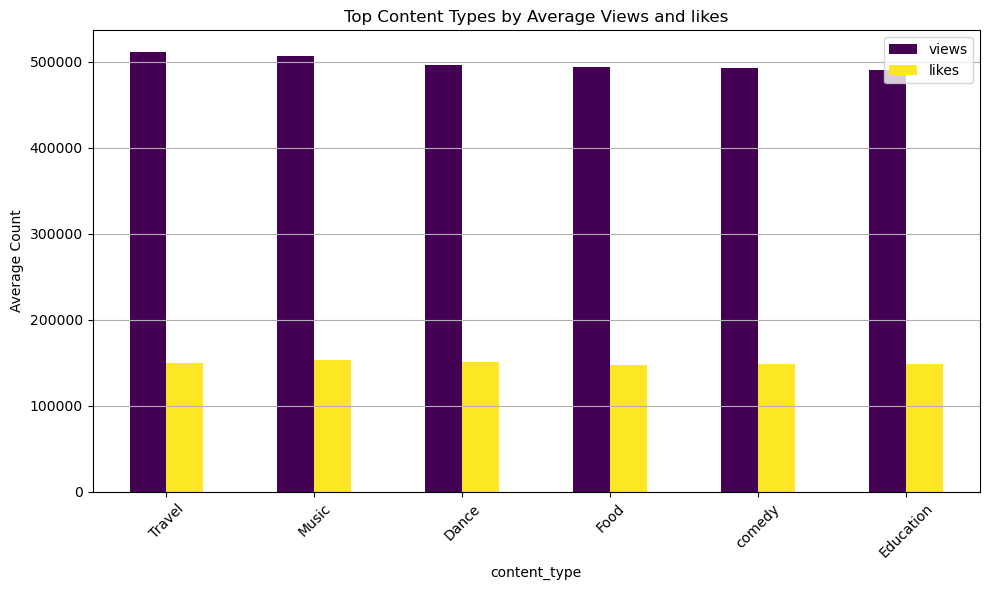

In [20]:
avg_metrics.plot(kind= 'bar', figsize=(10,6), colormap='viridis')
plt.title('Top Content Types by Average Views and likes')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Correlation Heatmap(Likes, Viwes, Comments)

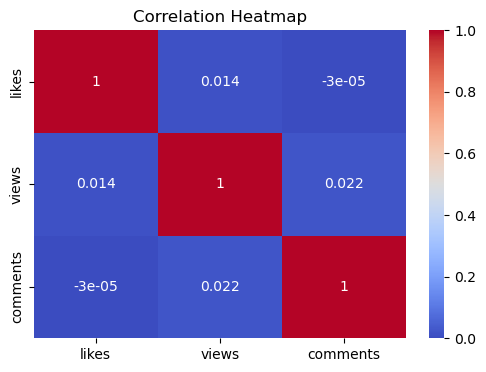

In [36]:
corr = data[['likes', 'views', 'comments']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Most Frequent hashtags

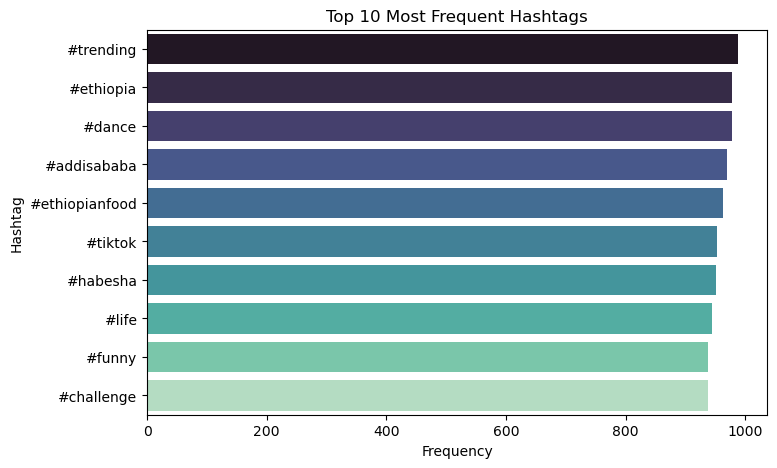

In [41]:
from collections import Counter

hashtags = data['hashtags'].dropna().str.lower().str.split(',')
flat_hashtags = [tag.strip() for sublist in hashtags for tag in sublist]
top_hashtags = Counter(flat_hashtags).most_common(10)

tags, counts =zip(*top_hashtags)
plt.figure(figsize=(8,5))
sns.barplot(x=counts, y=tags, hue=tags, palette='mako')
plt.title('Top 10 Most Frequent Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()

## Likes vs Views Scatter Plot

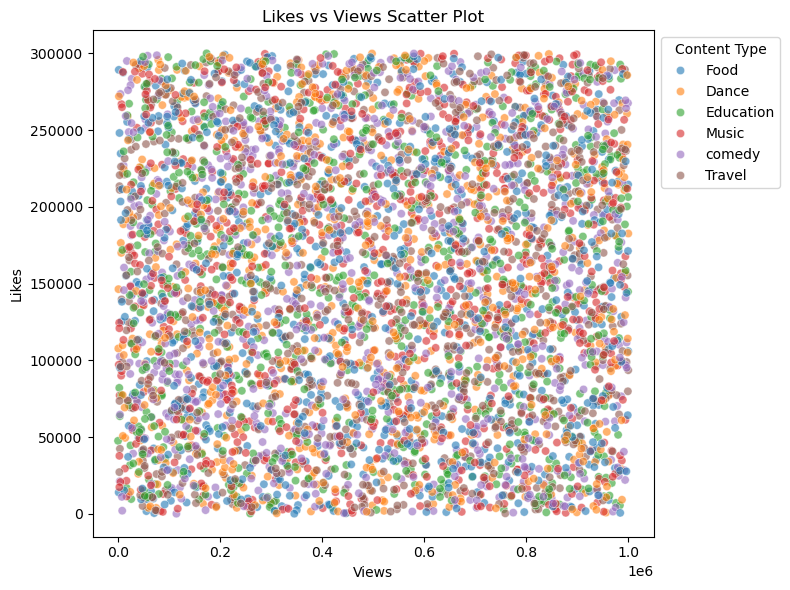

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='views', y='likes', data=data, hue='content_type', alpha=0.6)
plt.title('Likes vs Views Scatter Plot')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.legend(title='Content Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [44]:
data.head(2)

,video_id,author,hashtags,views,likes,comments,video_duration,content_type,year,engagement_rate
0,1,user_103,"#ethiopianmusic,#addisababa,#funny,#challenge",104146,15497,41443,134,Food,2023,0.546732
1,2,user_180,#life,79284,295690,10304,224,Dance,2024,3.859467


##  Engagement by Content Type

In [46]:
data['Engagement Rate'] = (data['likes'] + data['comments']) / data['views']

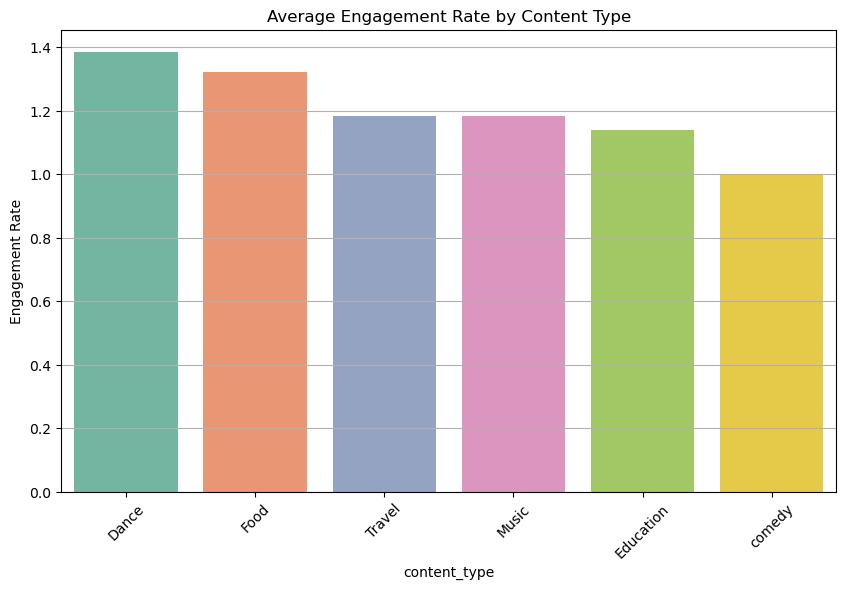

In [50]:
engagement = data.groupby('content_type')['Engagement Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=engagement.index, y=engagement.values, hue=engagement.index, palette='Set2', legend=False)
plt.title('Average Engagement Rate by Content Type')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Content Type Distribution

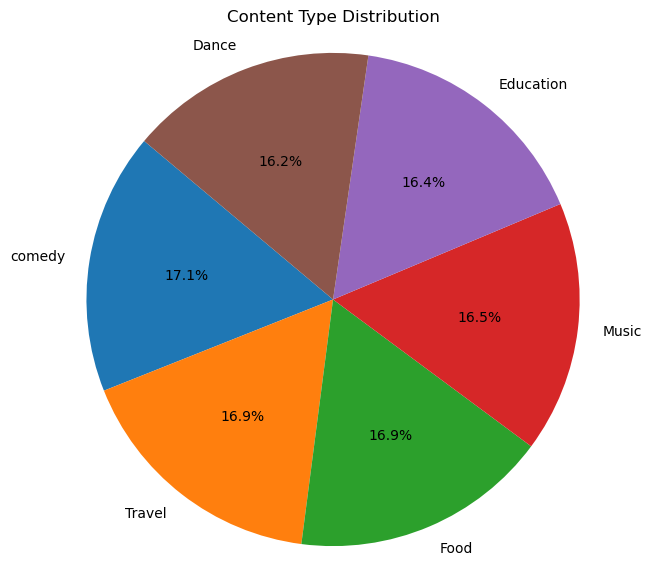

In [52]:
content_counts = data['content_type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Content Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

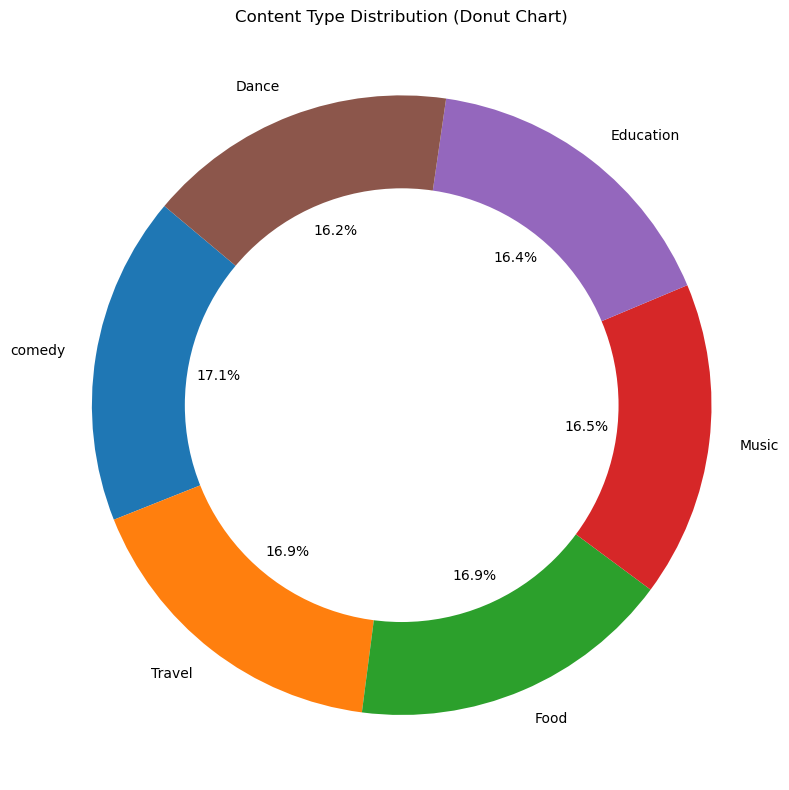

In [68]:
# Same data as above
content_counts = data['content_type'].value_counts()

# Donut chart
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4)
)

# Draw center circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Content Type Distribution (Donut Chart)')
plt.axis('equal')  
plt.tight_layout()
plt.savefig("tiktok_youth_influence_eda.png", bbox_inches='tight', dpi=300)
plt.show()

## Conclusion

- Dance and Education videos receive the most average likes and comments.
- Popular hashtags include #dance, #music, and #ethiopianmusic.
- Strong correlation observed between views and likes.
- This analysis provides a synthetic but insightful view of content dynamics on Ethiopian TikTok.